In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

dataset = pd.read_csv('/electronics.csv')

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [2]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
441571,1496,406929.0,5.0,2015-02-20,Female&Male,Headphones,JLAB,2010.0,NaN,0.0
441572,1496,406930.0,3.0,2015-02-20,Female&Male,Headphones,JLAB,2010.0,NaN,0.0
441573,1496,406931.0,5.0,2015-02-20,Female&Male,Headphones,JLAB,2010.0,NaN,0.0
441574,1867,406932.0,4.0,2015-02-20,Male,Camera & Photo,NaN,2012.0,NaN,0.0
441575,5724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.shape

(441576, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441576 entries, 0 to 441575
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     441576 non-null  int64  
 1   user_id     441575 non-null  float64
 2   rating      441575 non-null  float64
 3   timestamp   441575 non-null  object 
 4   model_attr  441575 non-null  object 
 5   category    441575 non-null  object 
 6   brand       137930 non-null  object 
 7   year        441575 non-null  float64
 8   user_attr   56047 non-null   object 
 9   split       441575 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 33.7+ MB


In [5]:
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

,timestamp
0,1999-06-13
1,1999-06-14
2,1999-06-17
3,1999-07-01
4,1999-07-06
...,...
441571,2015-02-20
441572,2015-02-20
441573,2015-02-20
441574,2015-02-20


In [6]:
dataset['brand'] = dataset['brand'].astype(str)

In [7]:
dataset['category'] = dataset['category'].astype(str)

In [8]:
dataset['rating'] = dataset['rating'].astype(float)

In [9]:
dataset['user_id'] = dataset['user_id'].astype(str)

In [10]:
dataset['item_id'] = dataset['item_id'].astype(str)

In [11]:
dataset.describe()

,rating,year,split
count,441575.000000,441575.000000,441575.000000
mean,4.074248,2011.166826,0.111687
std,1.329138,2.710772,0.441801
min,1.000000,1999.000000,0.000000
25%,4.000000,2010.000000,0.000000
50%,5.000000,2012.000000,0.000000
75%,5.000000,2013.000000,0.000000
max,5.000000,2018.000000,2.000000


In [12]:
dataset.nunique()

,0
item_id,6308
user_id,406934
rating,5
timestamp,5038
model_attr,3
category,11
brand,51
year,20
user_attr,2
split,3


In [17]:
dataset.duplicated().sum()


0

In [18]:
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,1
timestamp,1
model_attr,1
category,0
brand,0
year,1
user_attr,385529
split,1


<Axes: xlabel='rating', ylabel='count'>

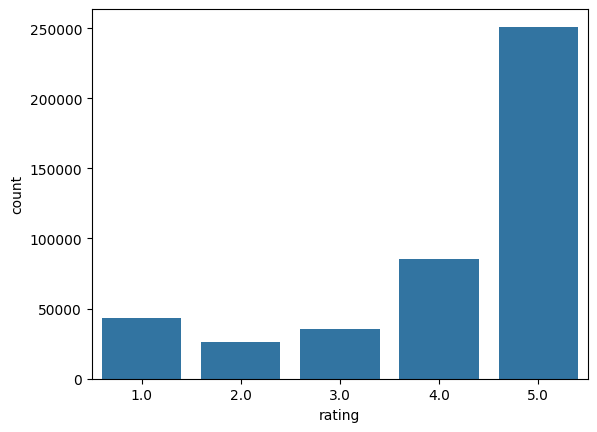

In [19]:
sns.countplot(x='rating', data=dataset)

<Axes: xlabel='year'>

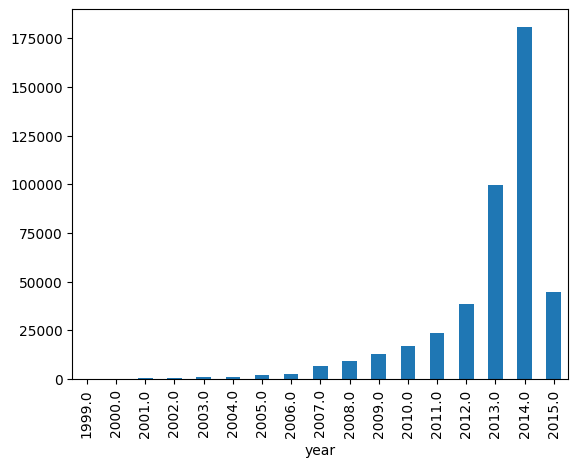

In [20]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

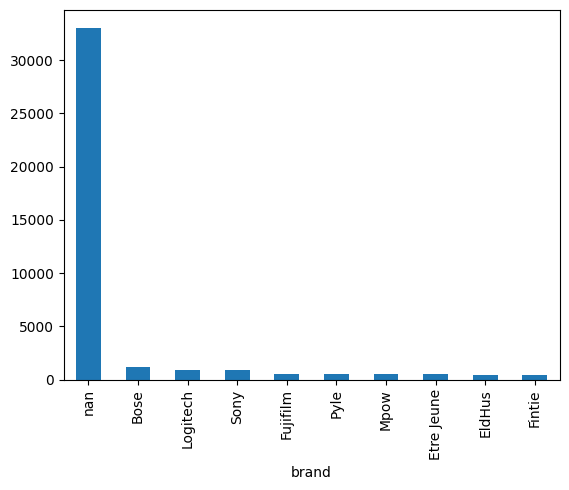

In [21]:
dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='year'>

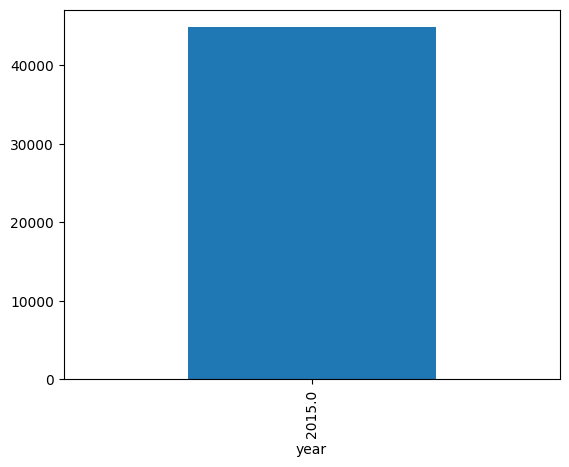

In [25]:
dataset[dataset['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

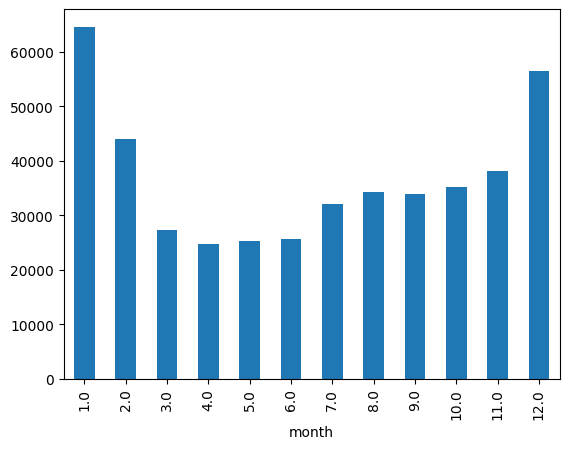

In [26]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

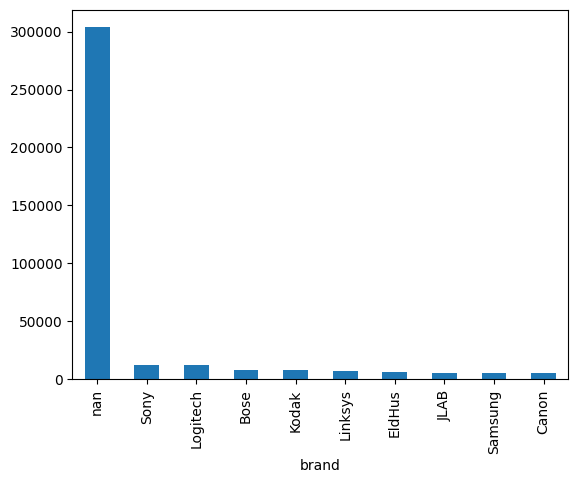

In [27]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

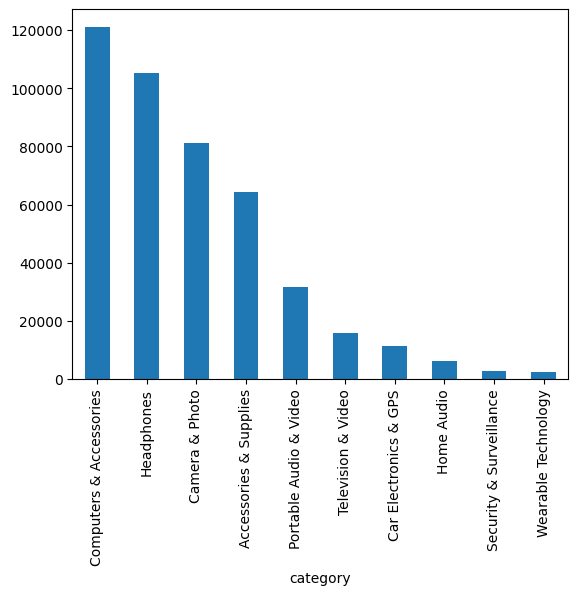

In [28]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

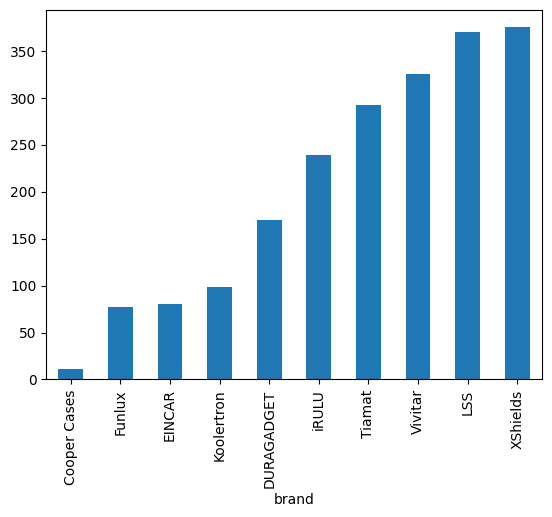

In [29]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='category'>

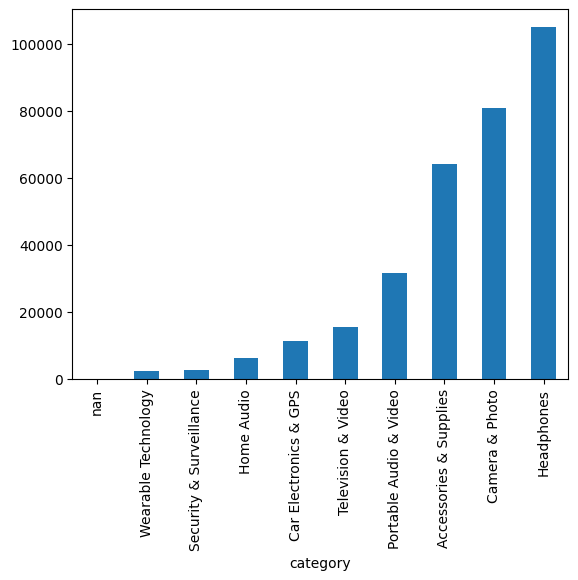

In [30]:
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

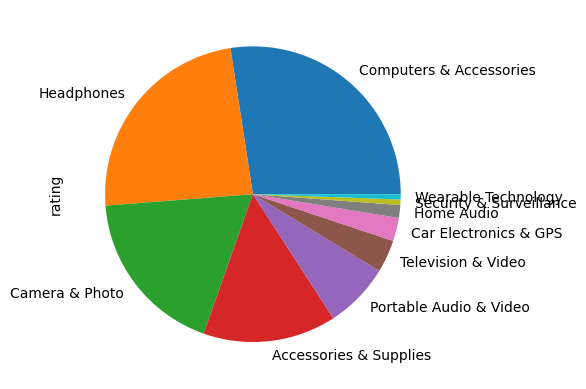

In [31]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

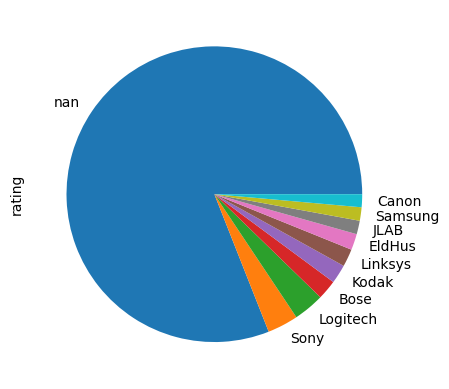

In [32]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')